In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

In [2]:
from PRmm.io import *
from PRmm.fixture import Fixture
from PRmm.extras.hqrfHmm import loadBazViewerHDF5



#fx = Fixture.fromIniFile("fixtures.ini", "DarkStart-BauhausNoHQMapping")
fx = Fixture.fromIniFile("fixtures-no-traces.ini", "DarkStart-BauhausNoHQMapping")



### Armin got some "dark start" data where it looks like HQRF is throwing away some good long reads.  Is HQRF screwing up?


### Data provenance:

  Original data, including BAZ file...
  /pbi/collections/318/3180151/r54004_20161115_024308/1_A01/

  BAM with asymmetric adapter calls:
  ~atoepfer/jdrake/

  Bauhaus:
  ~atoepfer/jdrake/nohqmapping

  ZMWs of interest (length in kb):
  
| ZMW_NUM | ZMW RL | HQ RL |
|---------|--------|-------|
| 4850578 |     63 |     2 |
| 5374920 |     53 |     1 |
| 5440241 |     64 |     0 |
| 5505375 |     43 |     4 |
| 5571312 |     30 |     0 |
| 5571345 |     31 |     0 |
| 5702566 |     45 |     9 |
| 5833103 |     65 |     1 |
| 6029626 |     46 |    12 |



ZMW: `5571345`

Original: 
0_31294 LQ
32621_32664 Adapter
37085_37134 Adapter
38536_42184 LQ

Unrolled:
81 Soft clipped, remaining 42kb aligned

consolidated unrolled `~atoepfer/jdrake/unrolled_smrtlink/all_chunk.bam`

In [3]:
# Make a "fixture" file
fixtures = """
[DarkStart-BauhausNoHQMapping]
Traces=/pbi/collections/318/3180151/r54004_20161115_024308/1_A01/m54004_161115_024323.trc.h5
Bases=/pbi/collections/318/3180151/r54004_20161115_024308/1_A01/m54004_161115_024323.subreads.bam
Pulses=/pbi/collections/318/3180151/r54004_20161115_024308/1_A01/m54004_161115_024323.subreads.bam
Alignments=/home/UNIXHOME/atoepfer/jdrake/unrolled_smrtlink/all_chunk.bam
Reference=/mnt/secondary/iSmrtanalysis/current/common/references/pBR322_HindIII_scr_F_EcoRI_tc6_R_unrolled12x/sequence/pBR322_HindIII_scr_F_EcoRI_tc6_R_unrolled12x.fasta
"""

!echo '{fixtures}' > fixtures.ini


In [4]:
zmwsOfInterest = map(int, open("/pbi/collections/318/3180151/r54004_20161115_024308/1_A01/bazViewerOutput/zmwsToLookAt").read().split(",")[:-1])

In [5]:
metricsDf = loadBazViewerHDF5("/pbi/collections/318/3180151/r54004_20161115_024308/1_A01/bazViewerOutput/all.h5")


array('f', [4.962400436401367, 9.182706832885742, 5.371946811676025, 8.135210990905762])


<function __main__.plotMetricsP>

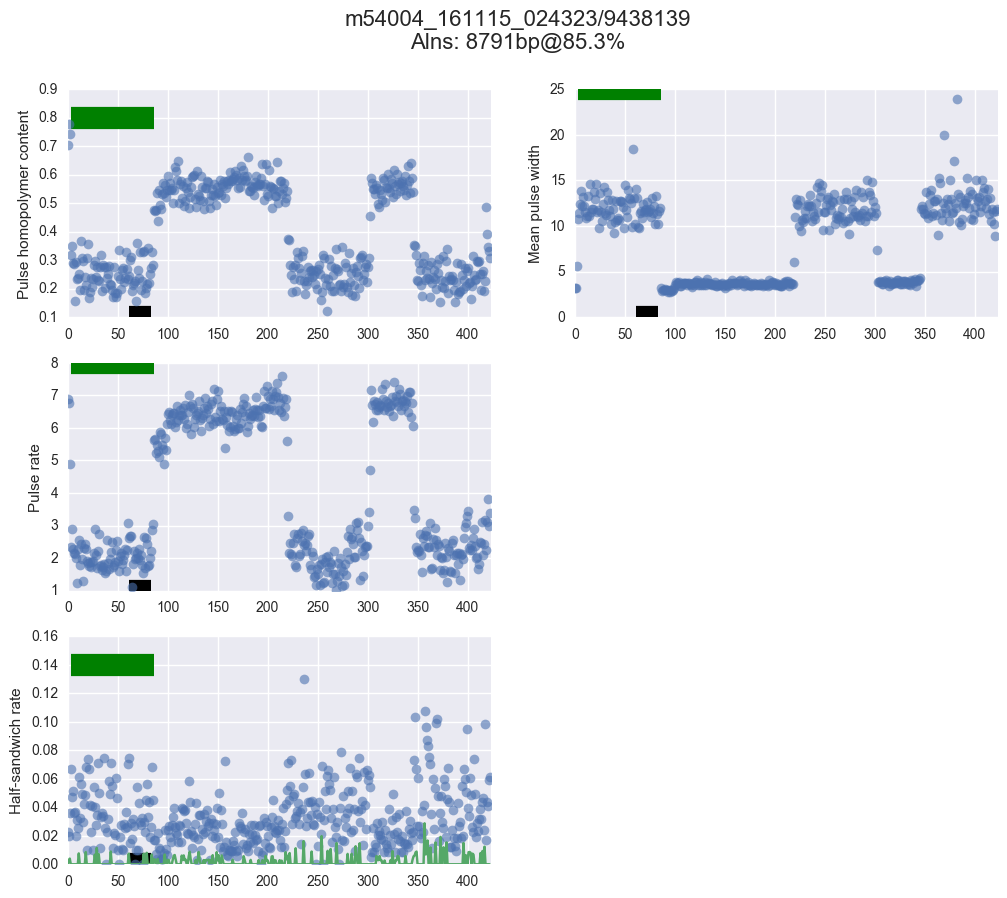

In [6]:
from PRmm.extras.activityPlots import hdf5MetricsPlot
from ipywidgets import *

def plotMetricsP(hnString):
    hn = int(hnString)
    z = fx[hn]
    hdf5MetricsPlot(metricsDf, hn, fx)
    print z.hqRegionSnr
    
hnW = Select(options=map(str, zmwsOfInterest))

interact(plotMetricsP, hnString=hnW)    


    

In [ ]:
# ZMW 68157852 seems odd.  why do we have a full HQ region, despite some high sandwich rates
hn = 68157852
#hn = 9503437
dfZ = metricsDf[metricsDf.ZmwNumber==hn]                

In [ ]:
from PRmm.extras.hqrfHmm import EnhancedHQRegionFinder2 

hqrf = EnhancedHQRegionFinder2()

hqrf.findHQRegion(dfZ)


In [ ]:
set(metricsDf.ZmwNumber)

In [ ]:
fx

In [ ]:
dfZ.columns